# Этапы анализа данных

## Понимание задачи

__Вопрос__: какой тип задачи?

- Регрессия: $Y \in \mathbb{R}$
 - Сколько денег потеряет банк, выдав кредит клиенту?

- Классификация: $Y = \{0, 1\}$ 
 - Сможет ли клиент вернуть кредит?
 
- Кластеризация: $Y =?$
 - Найти группы клиентов банка, имеющих схожее поведение

__Вопрос__: как измеряется качество решения? 

- В регрессии:
 - MSE: $\frac{1}{l}\sum_{i=1}^{l}(a(x_i)−y_i)^2$ 
 - MAE: $\frac{1}{l}\sum_{i=1}^{l}|a(x_i)−y_i|$ 

- В классификации:

 - Доля верных ответов: $\frac{1}{l}\sum_{i=1}^{l}[a(x_i)=y_i]$ 
 - Точность и полнота 
 - AUC-ROC, AUC-PRC

- В кластеризации:
 - Зависит от конкретной задачи

__Вопрос__: как измеряется качество решения?

Бизнес-метрики:
- Прибыль интернет-магазина после внедрения рекомендательной системы
 - Алгоритм предсказывает, какой товар купит пользователь
 - Оптимизация прибыли не эквивалентна оптимизации числа верных ответов!
- Количество кликов в письмах с рекомендациями отелей
 - Алгоритм предсказывает, кликнет ли пользователь по рекламе отеля
 - Сколько отелей рекомендовать — один, три, шесть? 
 - Качество фотографий отеля важнее, чем качество модели?

## Данные

__Вопрос__: на основе каких данных будем решать задачу? 

- Числовые признаки: возраст, доход, ...

- Категориальные признаки: образование, цвет, идентификатор пользователя

- Текстовые признаки 
- Изображения, сигналы 
- Координаты

## Формирование признаков (feature engineering)

__Задача__: получить матрицу "объекты-признаки"

- Преобразование числовых признаков

- Извлечение числовых признаков из сырых данных

 - Категориальные признаки 

 - Текстовые признаки

## Предобработка данных

Данные могут быть "грязными":

- Выбросы

- Шумы в признаках 

- Пропущенные значения

Мусор на входе — мусор на выходе

## Построение алгоритма

Основные семейства в задачах обучения с учителем:

- Линейные модели

- Композиции деревьев (градиентный бустинг, случайный лес)

- Нейронные сети (глубокое обучение — много слоев, сложная архитектура)

А также:

- Отбор признаков

- Понижение размерности

## Оценивание качества

Как оценить качество алгоритма и настроить гиперпараметры?

- Отложенная выборка 

- Кросс-валидация

 - Сколько блоков?

- Как разбивать данные на блоки?

## Заключение

Основные этапы анализа данных:

1) Понимание задачи: постановка и мера качества

2) Понимание данных

3) Формирование признаков

4) Предобработка данных

5) Построение алгоритма

6) Оценивание качества

# Работа с числовыми признаками

## Числовые признаки

Возраст, доход, широта, год и т.д.

- уже готовы к использованию 

- но можно улучшить!

## Изобретение признаков

Пример:

- Нужно предсказать, потратит ли пользователь больше $10.000$ рублей в интернет-магазине в следующем месяце

- Ответ существенно зависит от суммы трат в прошлом месяце

- Среди признаков есть количество покупок $c_i$ в прошлом месяце для каждого из $50.000$ товаров, а также их цены $p_i$

- Можно до􏰀бавить суммарные траты как признак, повысив качество: $\sum_{i=1}^{50000} p_i c_i$

## Масштабирование признаков

- Разные признаки могут иметь разный масштаб 

- Пример: годовой доход в рублях и количество детей

- При измерении евклидова расстояние количество детей будет слабо влиять на результат

- Клиент $x_1$: $100.000$ рублей, $0$ детей

- Клиент $x_2$: $120.000$ рублей, $5$ детей

- Новый клиент $z$: $105.000$ рублей, $4$ детей 

- Расстояния: $\rho(z, x_1) \approx 5000,\ \rho(z, x_2) \approx 15000$ 

- Нужно приводить признаки к одному масштабу!

Важно для метрических, линейных, нейросетевых моделей. Не имеет значения для логических методов. Масштабировать не нужно, если вы пользуетесь решающими деревьями.

Способы масштабирования: 

- на среднее и дисперсию

$$\tilde{x}^j = \frac{x^j - \mu}{\sigma}$$

- на отрезок $[0, 1]$

$$\tilde{x}^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)}$$

## Трансформация признаков

Признаки могут иметь тяжелые хвосты

Наблюдения

- Качество выше, если распределение признаков близко к нормальному

- Простая эвристика для неотрицательных признаков: логарифмирование

$$\tilde{x}^j = \log(x^j + 1)$$

## Заключение

- Придумывать новые признаки — это искусство 

- Признаки нужно масштабировать

- Может быть полезно приводить распределение признака к нормальному

# Работа с категориальными и текстовыми признаками

## Категориальные признаки

Признаки, на которых нельзя ввести порядок: тэги, города, цвета и т.д.

Dummy-кодирование:

- Признак $x_j$ принимает значения из множества $U = \{u_1,\ldots,u_m\}$

- Создадим $m$ новых признаков-индикаторов $x^{j1},\ldots,x^{jm}$:

$$x^{jk} =[x^j =u_k]$$

Пример:

- $U$ = {Москва, Санкт-Петербург, Екатеринбург} 

- Кодируем тремя бинарными признаками 

- Москва $\rightarrow (1, 0, 0)$

- Санкт-Петербург $\rightarrow (0, 1, 0)$

- Екатеринбург $\rightarrow (0, 0, 1)$

## Проблемы dummy-кодирования

Уникальные категории:

- Что, если Екатеринбург встречается в выборке лишь один раз?

- Один из кодирующих признаков примет значение $1$ лишь на одном объекте

- Такой признак не имеет смысла

Решение:

- Объединить редкие категории в одну 

- Категория $u$ редкая, если 􏰀$\sum_{i=1}^{l}[x_i^j = u] \leq r$ 

- $r$ — параметр, который имеет смысл настраивать по кросс-валидации или по отложенной выборке. 

Задача: предсказать, кликнет ли пользователь по рекламному баннеру

Признаки:

- Идентификатор пользователя

- Идентификатор баннера

- Идентификатор сайта, на котором показан баннер 

- Идентификатор категории баннера

При dummy-кодировании мы получим миллионы признаков!

## Счетчики

Идея:

- Пусть на баннер $u_1$ в среднем кликают чаще, чем на баннер $u_2$

- Это важный признак!

- Заменим категории на вероятности кликов

Счетчики:

- Задача классификации, $Y = \{0, 1\}$

- Оценим вероятность первого класса при условии значения признака:

$$c(u_k) = p(y = 1|x^j = u_k) = \frac{\sum_{i=1}^{l}[x_i^j=u_k][y_i=1]}{\sum_{i=1}^{l}[x_i^j=u_k]}$$

- Заменяем категориальный признак $x^j$ на числовой $\tilde{x}^j$:

$$\tilde{x}_i^j = c (x_i^j)$$

- Для борьбы с переобучением можно вычислять счетчики с помощью кросс-валидации

 - выборка разбивается на $k$ частей

 - для $i$-й части используются оценки вероятностей, полученные по остальным частям

 - для контрольной выборки используются оценки, полученные по всей обучающей выборке

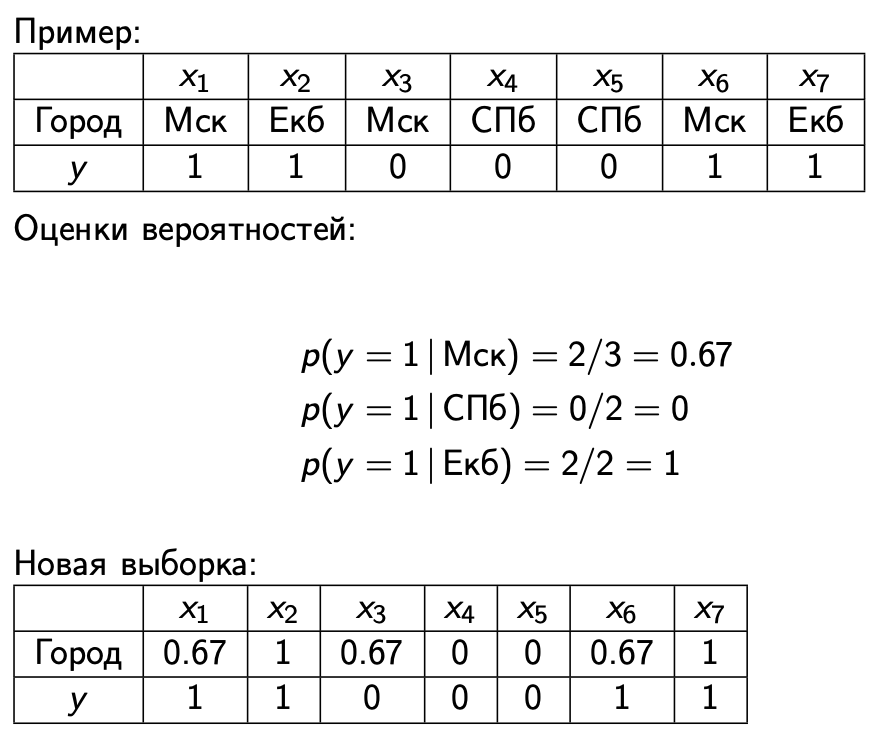

In [1]:
from IPython.display import Image
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_1.png')

## Текстовые признаки

Значение признака $x^j$ — последовательность слов $(w_1,w_2,\ldots)$.

Мешок слов:

- Выводы о тексте можно даже по перемешанным словам 

- Слова из текста принадлежат словарю $W = \{w_1 , \ldots, w_m\}$ 

- Создадим $m$ новых признаков-индикаторов $x^{j1},\ldots,x^{jm}$:

$$x^{jk} =n_{w_k},$$

$n_{w_k}$ — число вхождения слова $w_k$ в документ

- Аналог dummy-кодирования, но теперь несколько признаков могут быть больше нуля

Пример:

- $U$ = {ночь, улица, фонарь, аптека}
- Кодируем четырьмя бинарными признаками 
- ночь улица аптека ночь $\rightarrow (2, 1, 0, 1)$
- улица фонарь $\rightarrow (0, 1, 1, 0)$

## TF-IDF

Идея: вычислять не количество вхождений слов, а оценки их важности для текста

- чем чаще слово встречается в документе, тем оно важнее

- чем реже слово встречается в остальных документах, тем оно важнее

$n_{iw}$ (term frequency) — число вхождений слова $w$ в текст $x_i^j$;

$N_w$ (document frequency) — число текстов, содержащих $w$;

Важность слова $w$ для документа $x_i^j$:

$$\mathrm{TF-IDF}(i, w ) = \underbrace{n_{dw}}_{\mathrm{TF}(i,d)} \underbrace{\log(l/N_w)}_{\mathrm{IDF}(w)}.$$

$l$ - общее число текстов;

$\mathrm{TF}(i,d) = n_{iw}$ — term frequency;

$\mathrm{IDF}(w) = \log(l/N_w)$ — inverted document frequency.

## N-граммы

Иногда важны не только слова, но и словосочетания: 

- ”рекомендую“ и ”не рекомендую“

- ”разработчик“ и ”старший разработчик“

N-граммы:

- Добавим в словарь $W$ все возможные пары слов 

- Добавим признаки-индикаторы для пар слов:

$$x_{i}^{jks} = [(w_k,w_s) \in x_i^j]$$

- Многие пары ни разу не встречаются — выбросим их

Примеры биграмм:

”ночь улица фонарь аптека“ $\rightarrow$ (ночь, улица), (улица, фонарь), (фонарь, аптека)

## Заключение

- Для категориальных и текстовых признаков можно делать dummy-кодирование

- Для категориальных признаков могут быть полезны счетчики

- Для текстовых признаков можно вычислять не количество слов, а TF-IDF — меру важности

# Предобработка данных

## Проблемы в данных

Пусть есть некоторое число объектов для каждого из которых известны признаки: пол, возраст, город, доход, образование и индикатор того, вернул ли этот клиент кредит или не вернул.

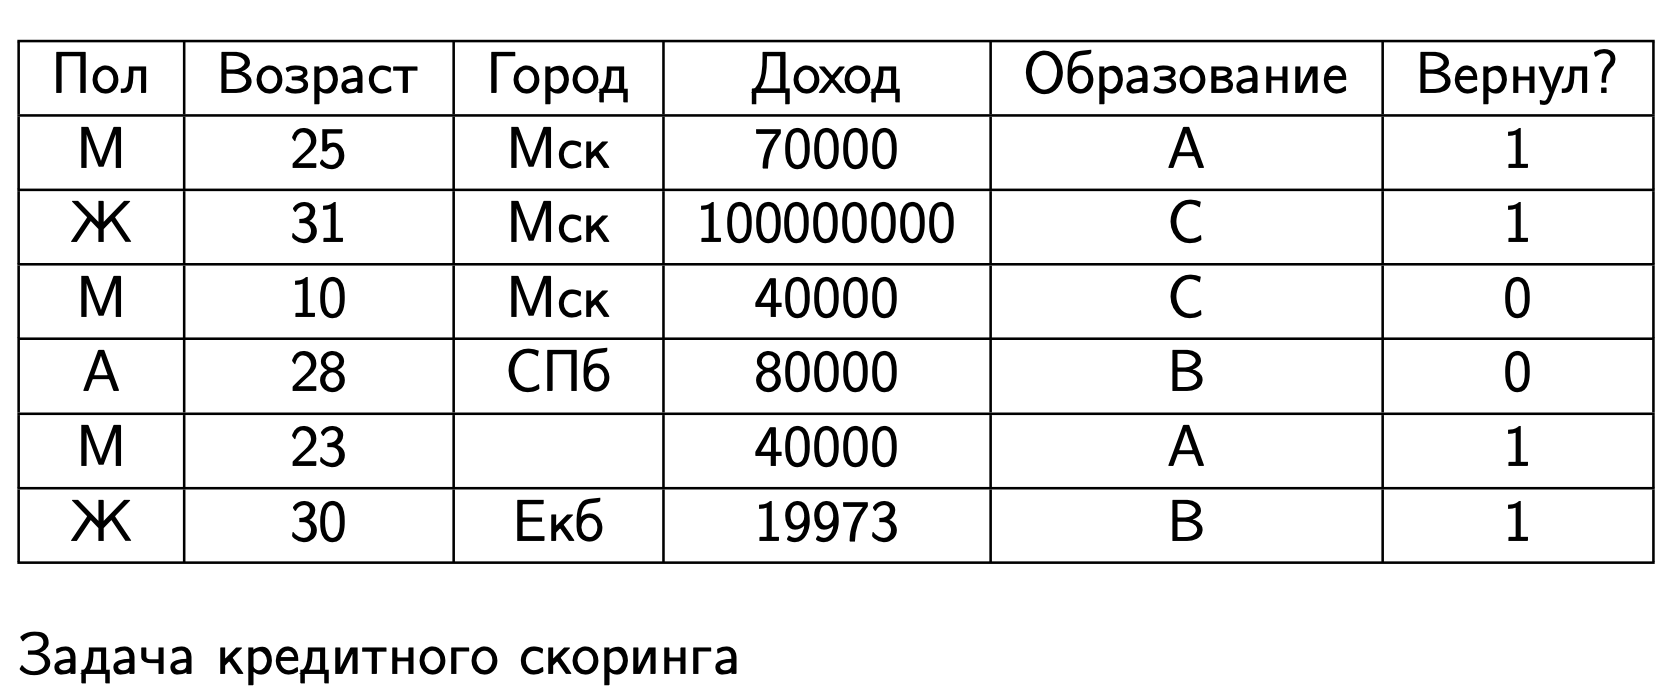

In [2]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_2.png')

Давайте посмотрим внимательнее на эту выборку. Вот первый признак — «пол». Он принимает значение М (мужчина) или Ж (женщина). Но у четвертого объекта значение признака «пол» равно А. Совершенно не ясно, что это. Наверняка это какая-то ошибка, которая произошла при заполнении этой таблицы.

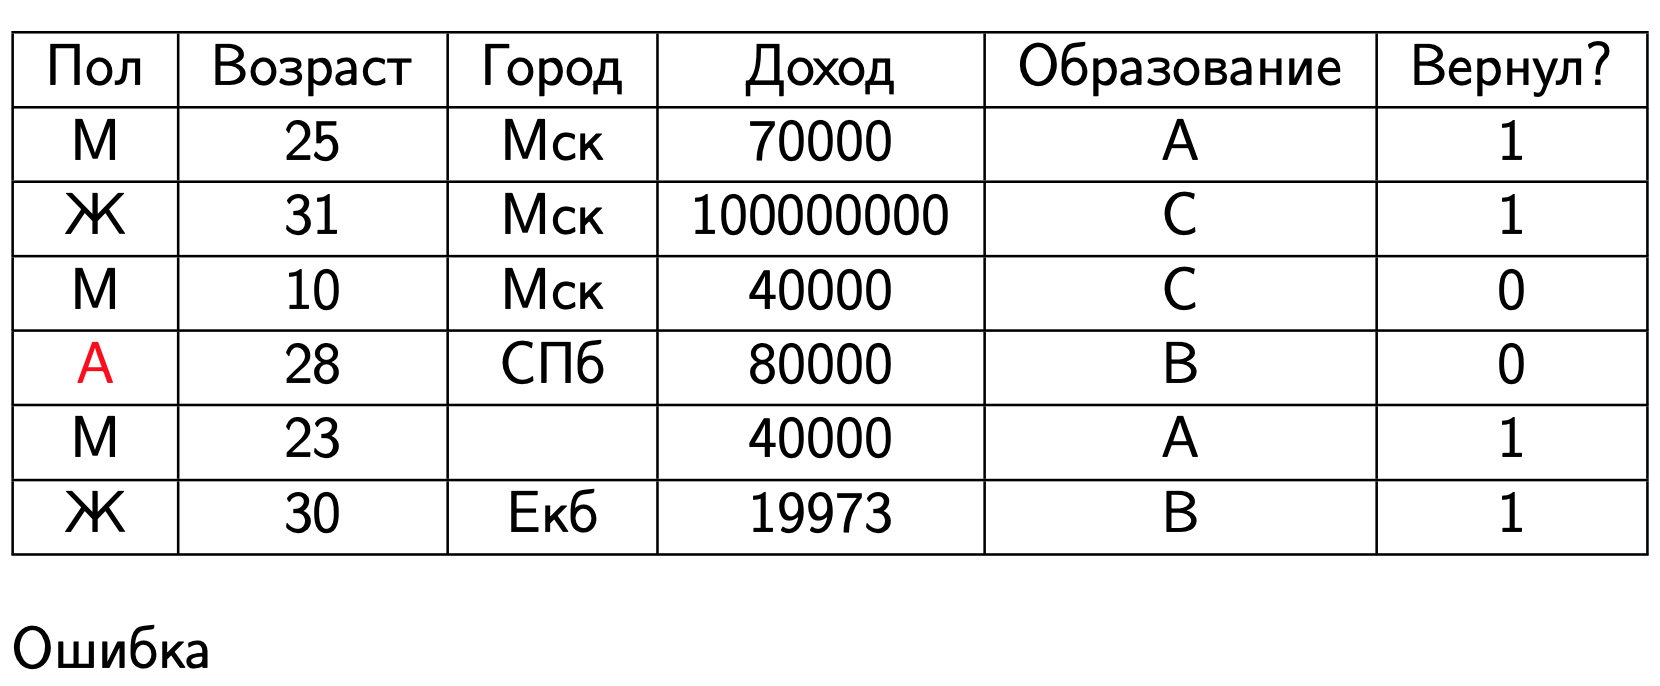

In [3]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_3.png')

Теперь посмотрим на признак «возраст». У третьего объекта он равен $10$-ти годам. Это тоже является ошибкой, кредит не могли дать клиенту, которому $10$ лет. Это некорректное значение, и нужно как-то его обработать.

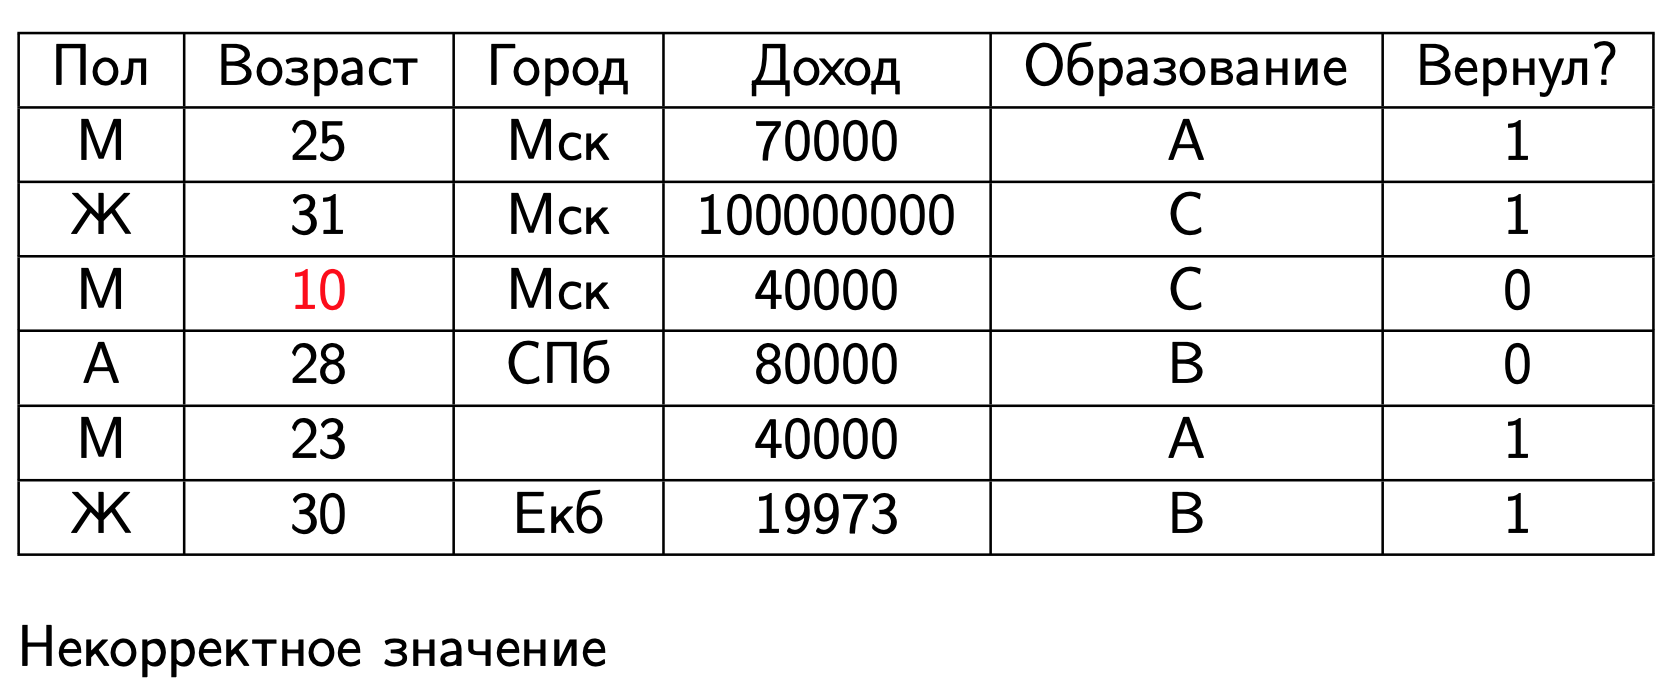

In [4]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_4.png')

У пятого объекта не известно значение признака «город», это пропущенное значение, его нужно как-то обработать, прежде чем идти дальше.

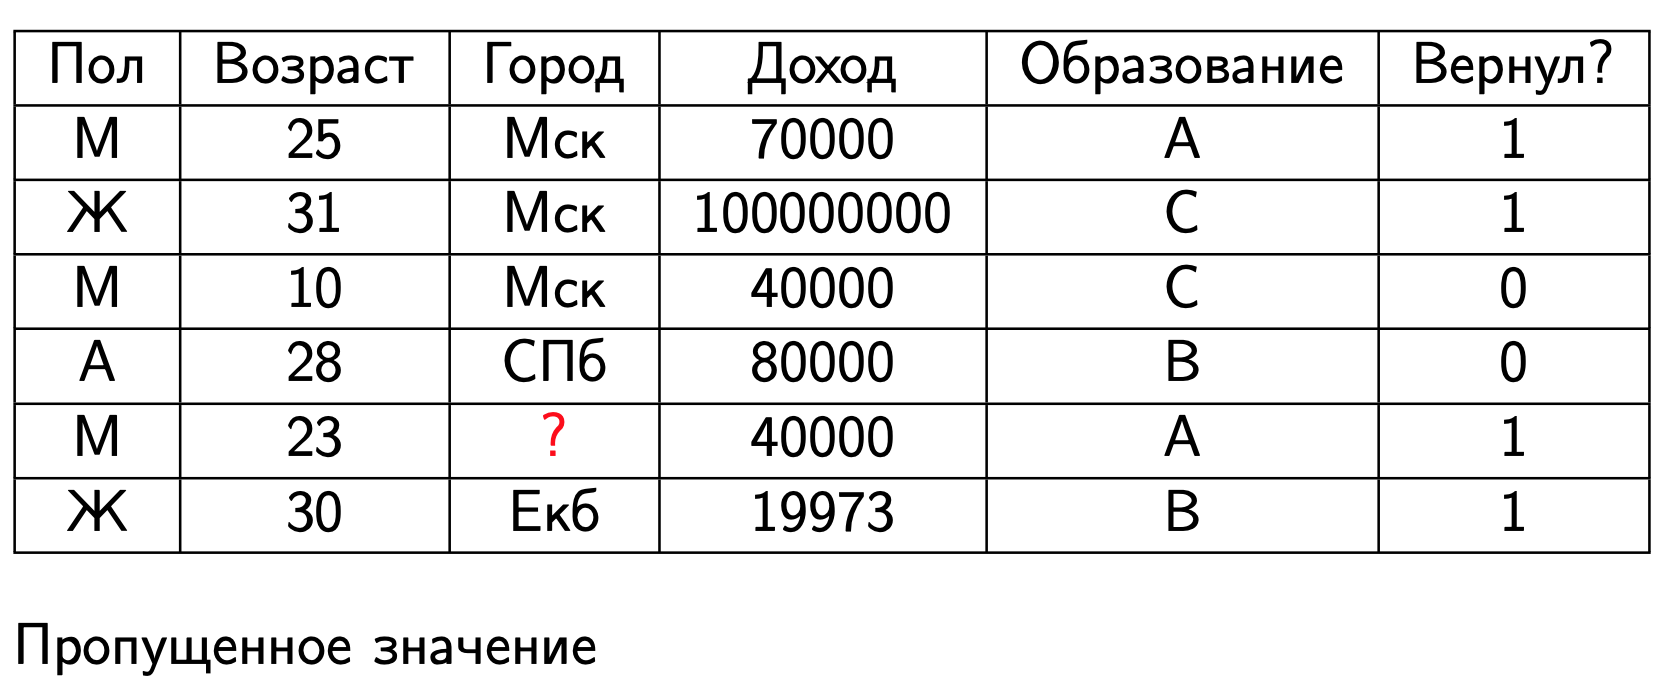

In [5]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_5.png')

В поле «доход» у второго объекта записано $100$ млн: это очень много, наверняка это какая-то ошибка. Также это может быть выбросом: это, может быть, корректное значение, но оно сильно отличается от остальных. В этом случае алгоритм будет настраиваться слишком плохо. Также это может быть специальное значение. Например, разработчики могут обозначать ста миллионами пропуск. Об этом нужно как-то узнать.

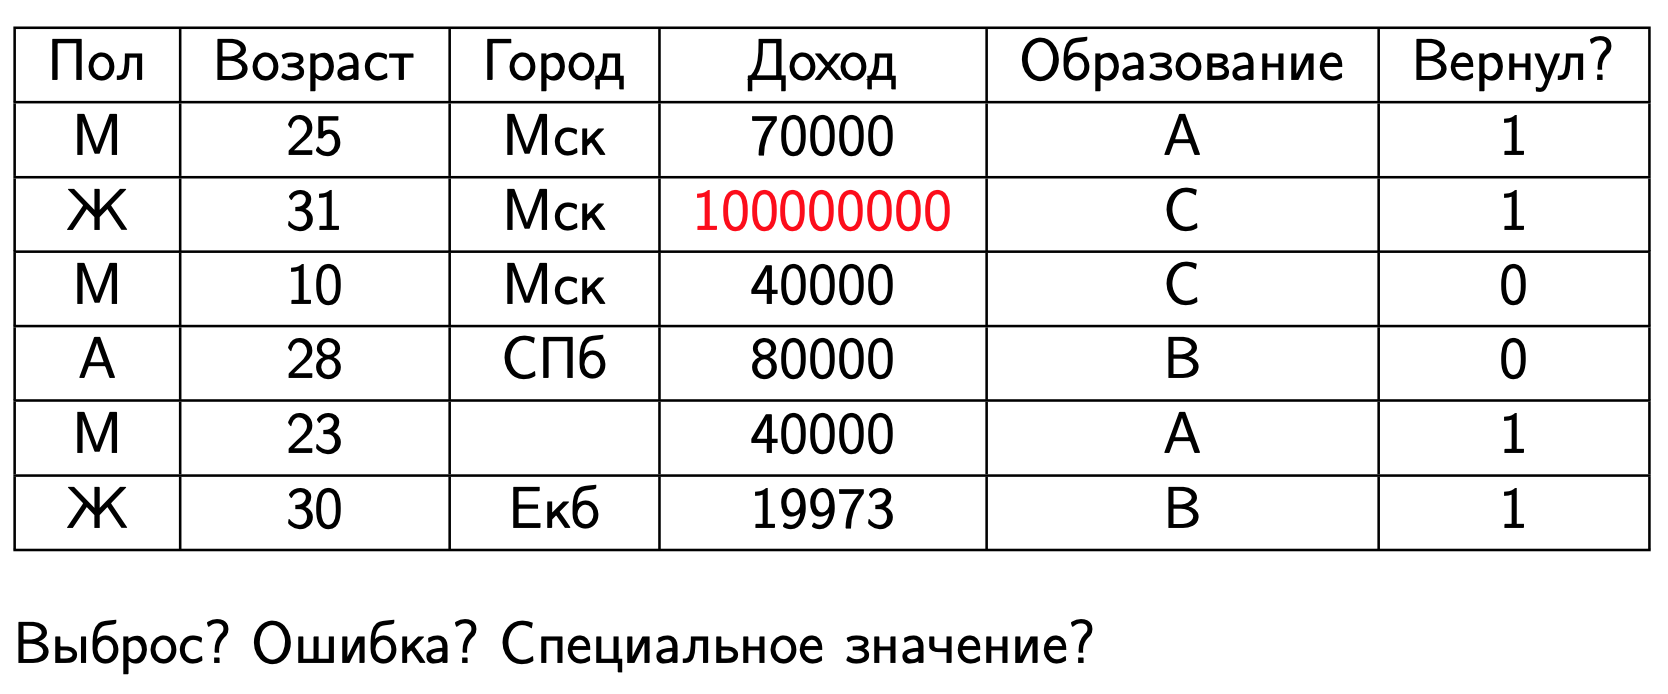

In [6]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_6.png')

Также есть проблема у последнего объекта — в поле «доход» у него записано число $19973$. Оно слишком точное, у всех остальных объектов доход округлен до тысяч. Это подозрительно, наверняка нужно разобраться в чем дело.

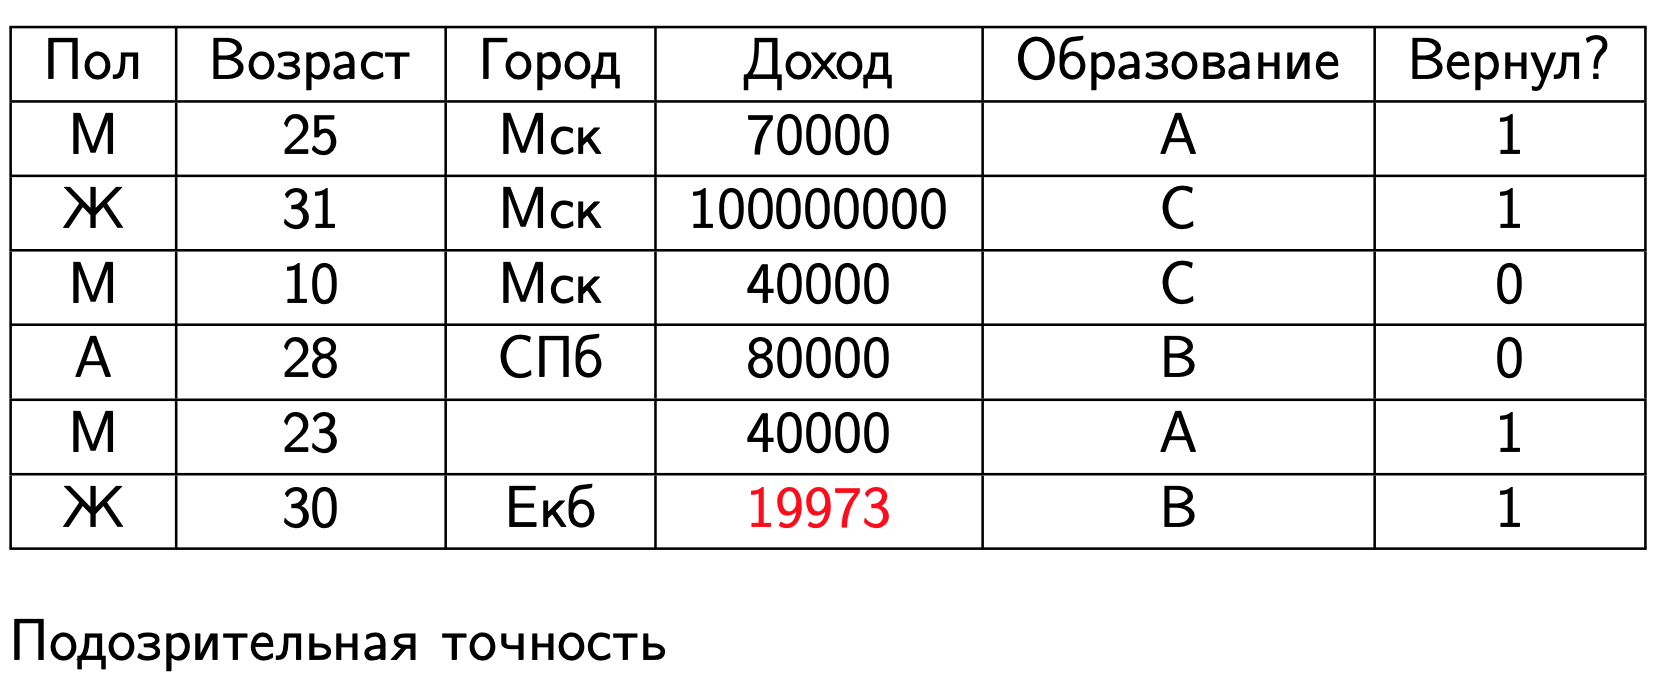

In [7]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_7.png')

Также есть проблема со всем столбцом про образование — мы не знаем, что он обозначает. Там есть значения А, В и С, но как они расшифровываются? Что лучше — А или С? Можем ли мы их сравнивать? Об этом всем хорошо бы узнать.

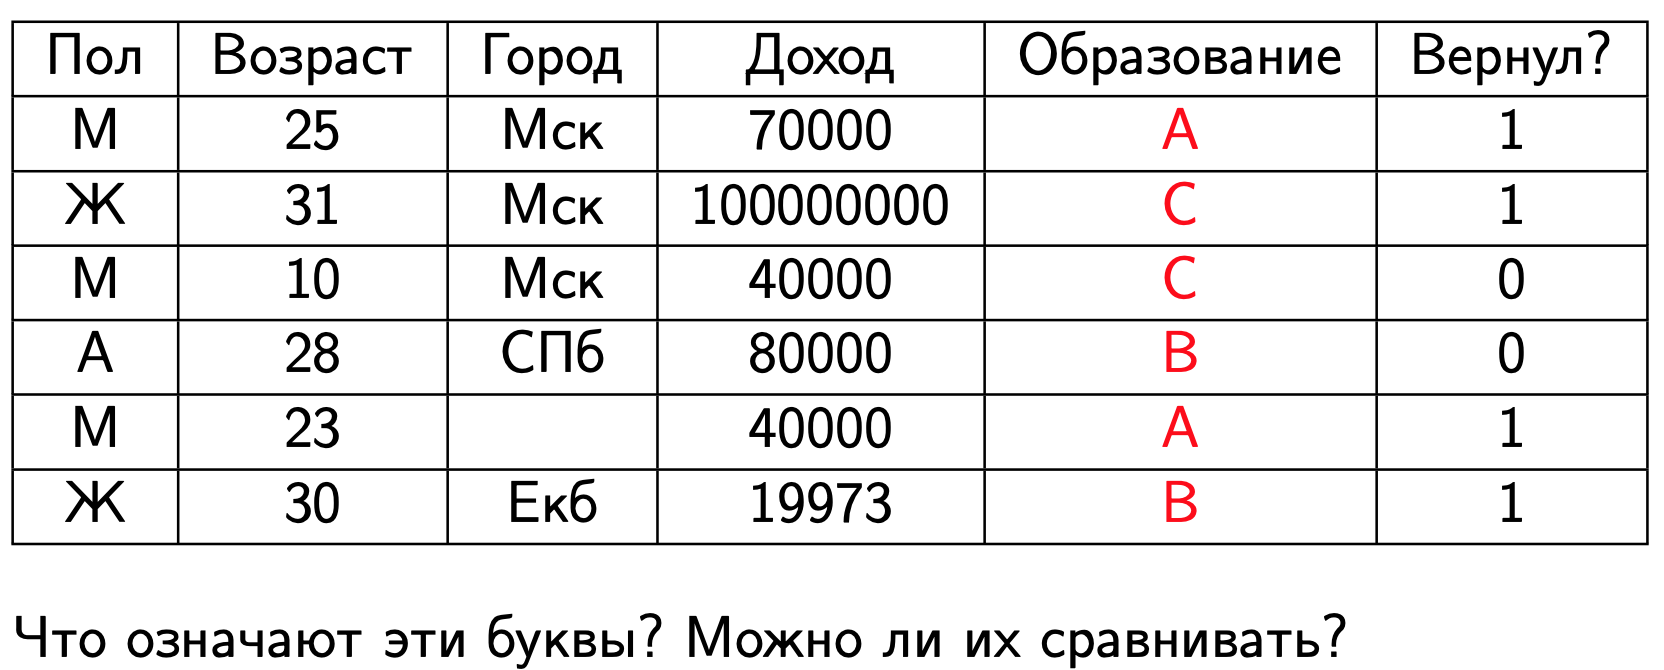

In [8]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_8.png')

## Фильтрация выбросов

Рассмотрим количество обращений пользователей мобильного оператора в колл-центр. Как правило, они обращались за всю свою историю $0$, может быть $1$ раз, может быть $2$, но не больше $10$-ти. И есть два пользователя, которые обращались $55$ и $59$ раз — это выбросы. Как их обнаружить? Для этого полезны такие статистики.

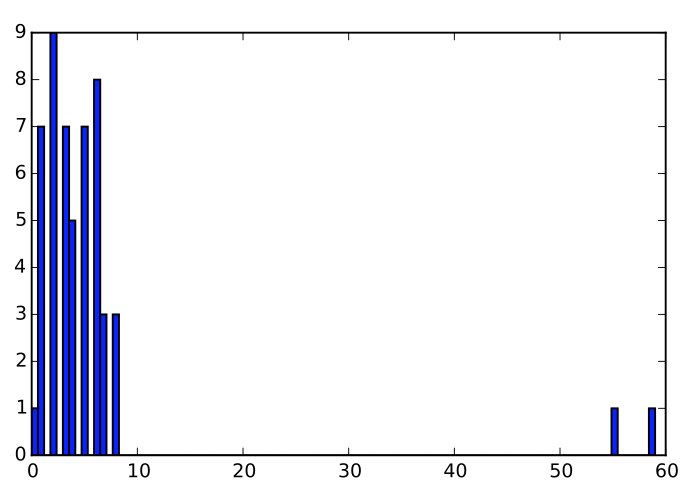

In [10]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_9.png')

Статистики:

- Первая квартиль $Q_1$: $\frac{1}{l}\sum_{i=1}^{l}[x_i \leq Q_1] = 0.25$

- Третья квартиль $Q_3$: $\frac{1}{l}\sum_{i=1}^{l}[x_i \leq Q_3] = 0.75$

- Интерквартильный размах: $IQR = Q_3 - Q_1$

Эвристика: выбросы лежат за пределами отрезка $[Q_1 - 1.5\cdot IQR,\ Q_3 + 1.5\cdot IQR]$

## Пропущенные значения

Вернемся к нашей выборке на кредитный скоринг и добавим в нее несколько пропусков в признаки «пол», «город» и «доход».

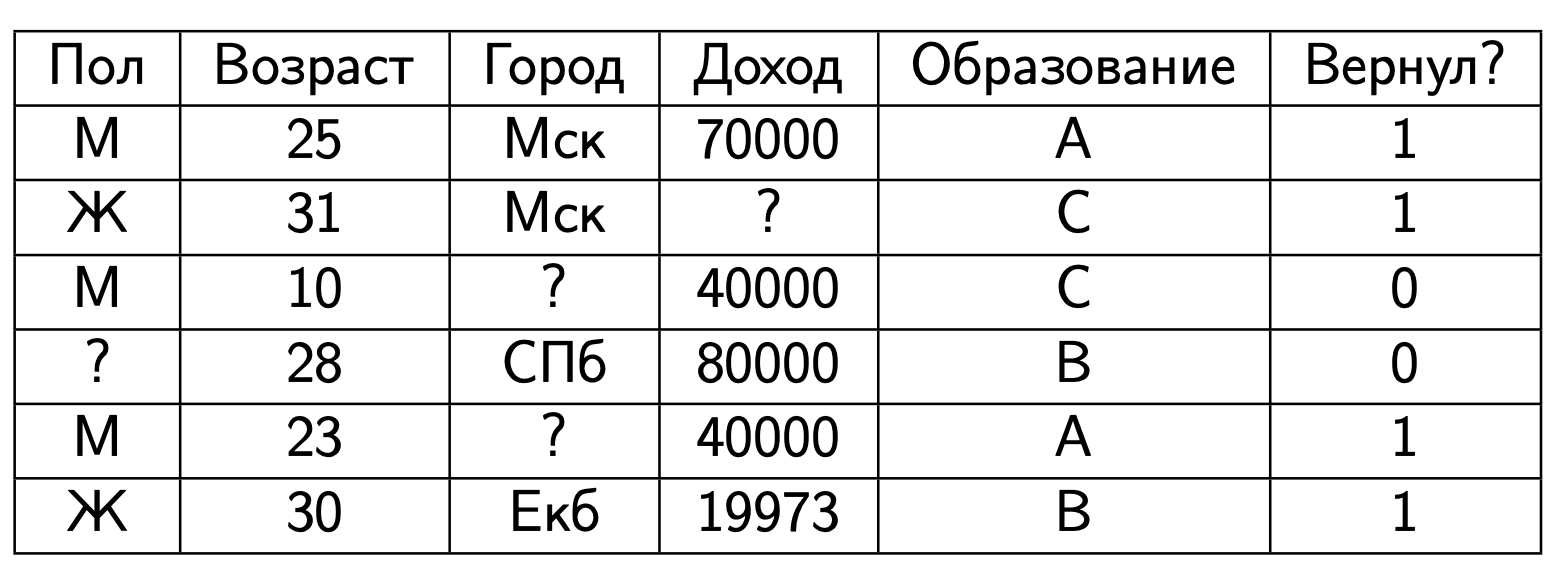

In [11]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_10.png')

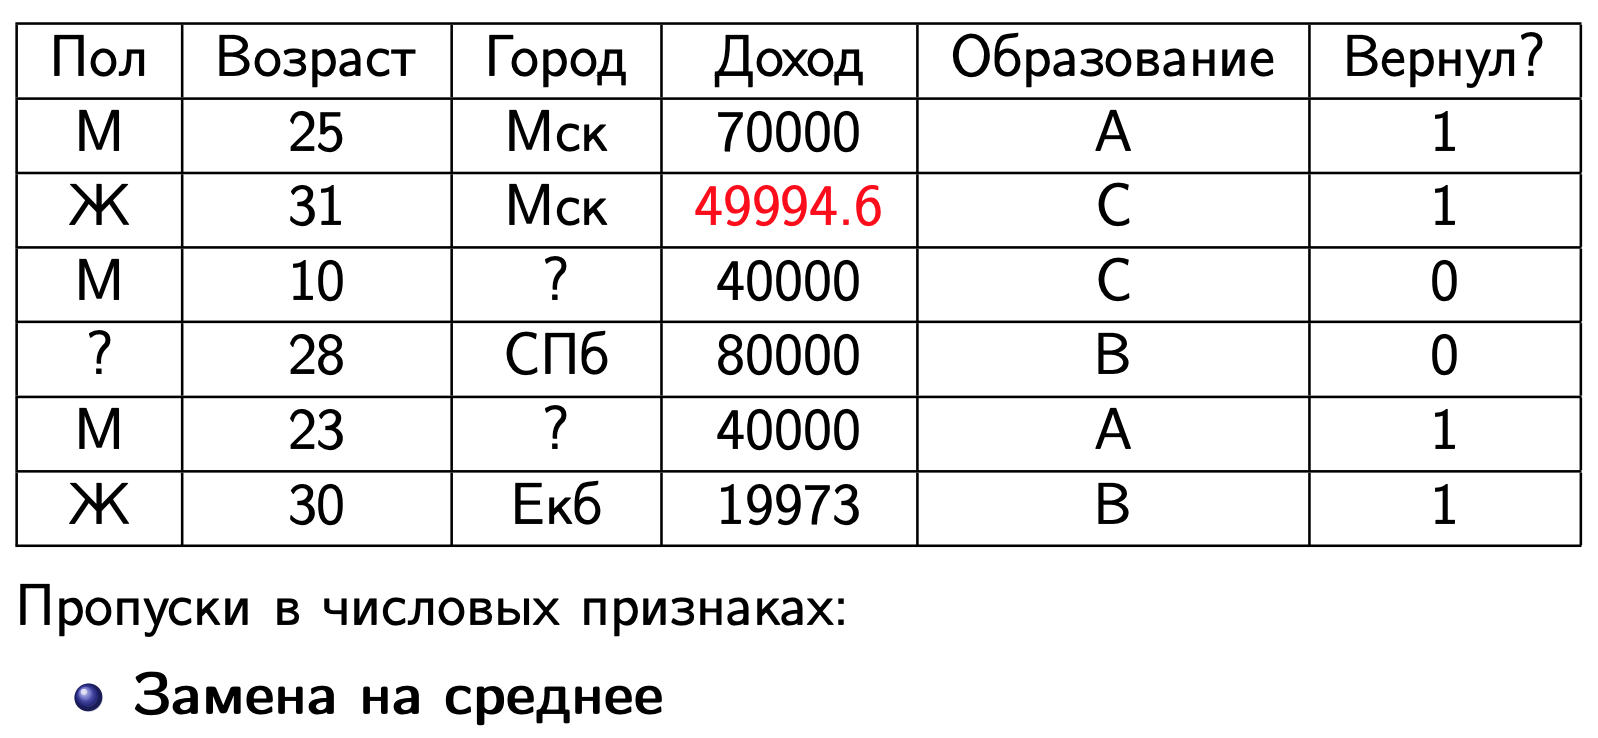

In [12]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_11.png')

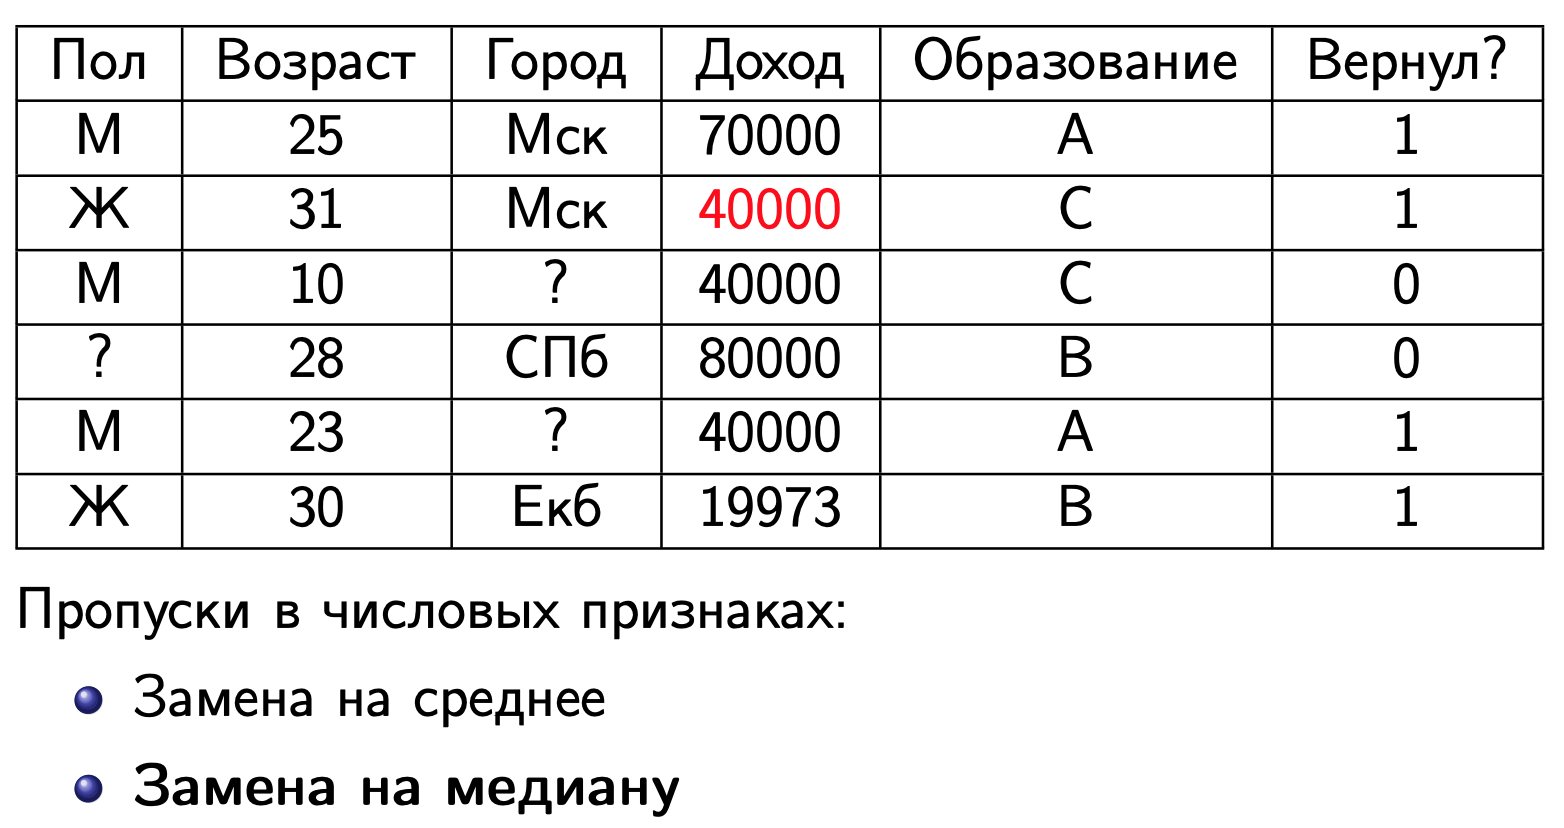

In [13]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_12.png')

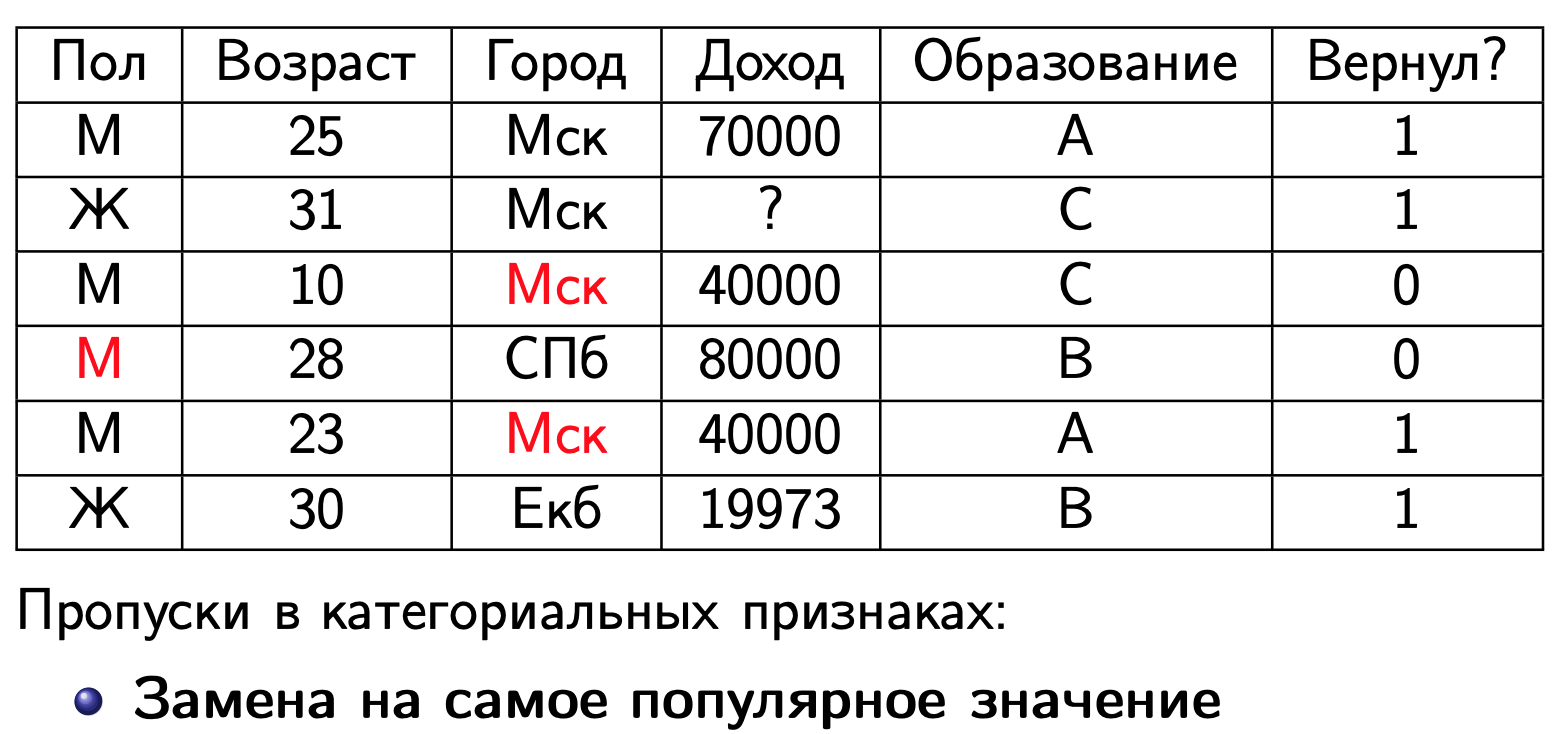

In [14]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_13.png')

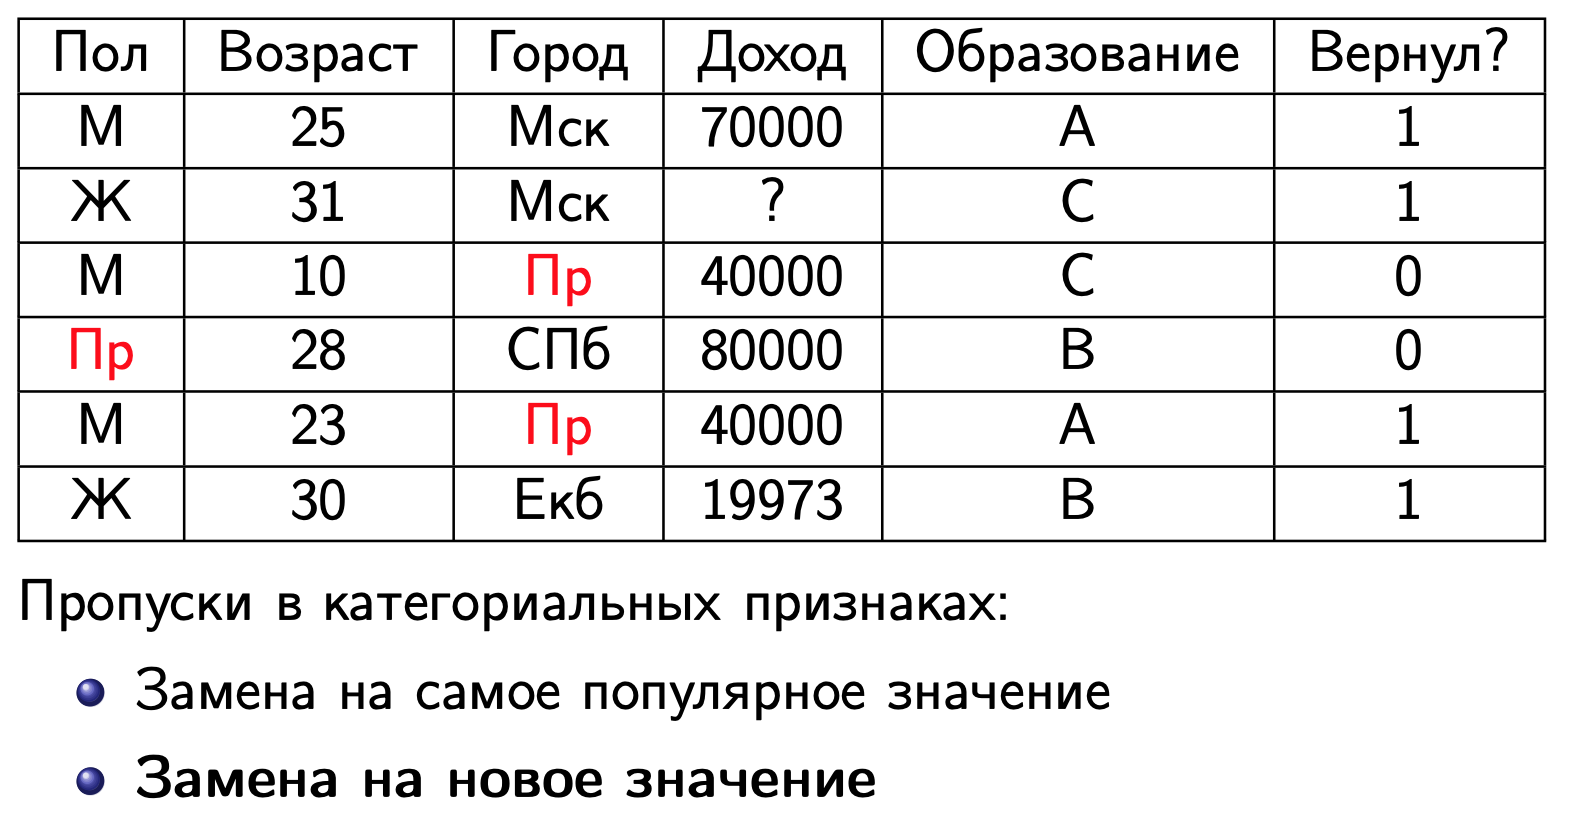

In [15]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_14.png')

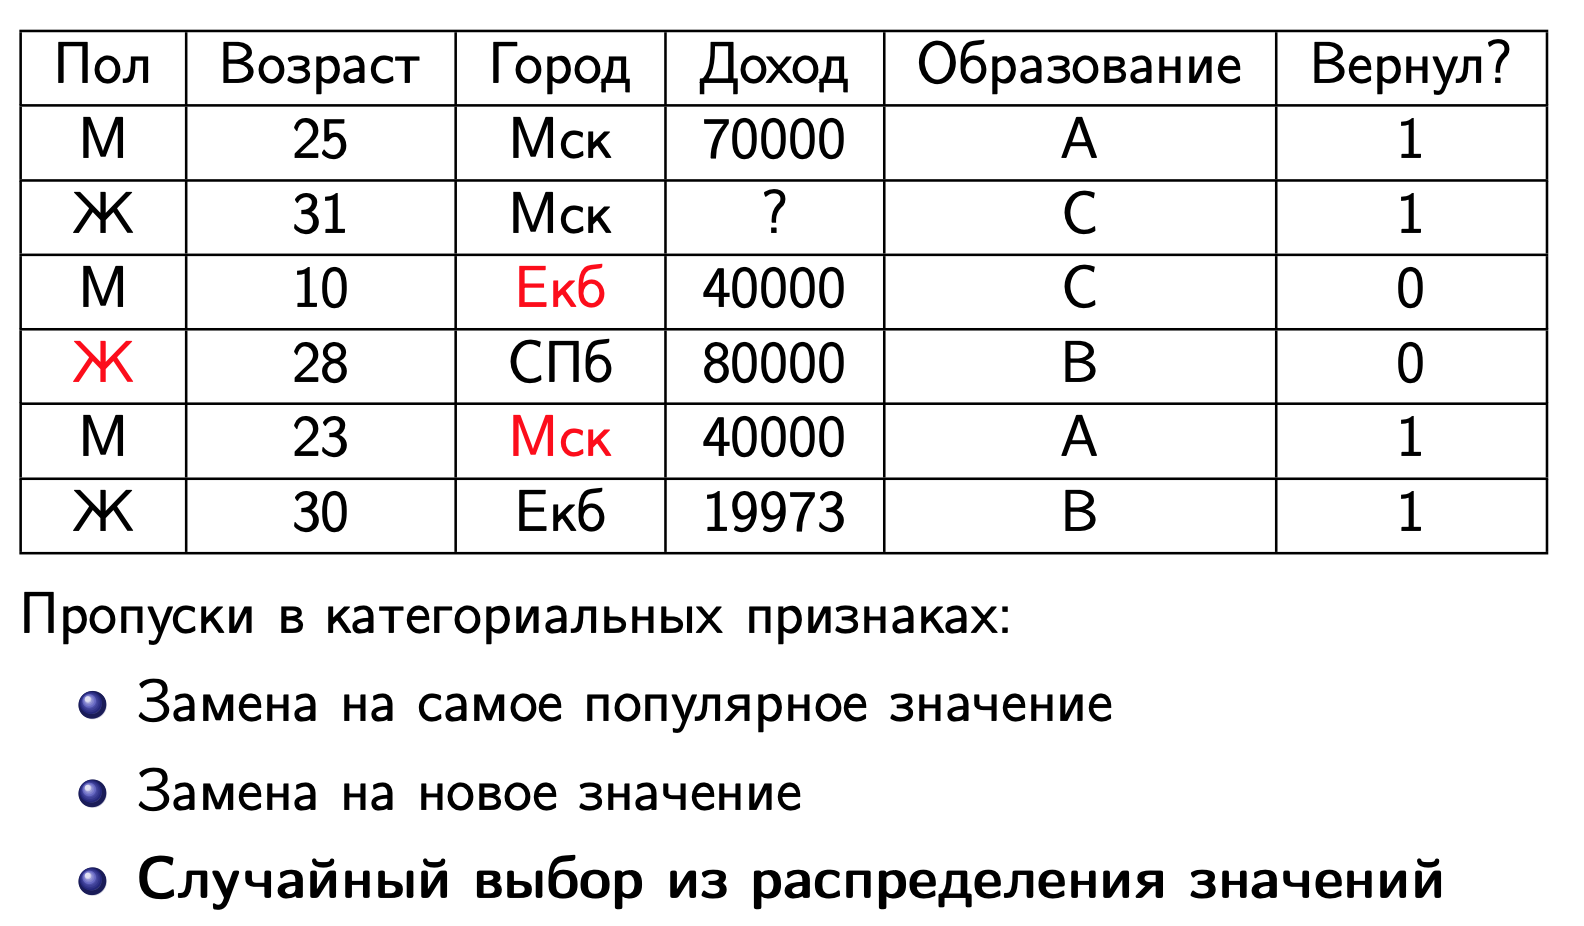

In [16]:
Image(filename='images/7.1 Машинное обучение в прикладных задачах/image_15.png')

## Заключение

- В данных может быть много проблем: пропуски, выбросы, некорректные значения

- Выбросы можно обнаруживать с помощью интерквартильного размаха

- Пропуски можно исправлять путем замены на разумные значения

# Оценивание качества

## Как проверить качество алгоритма?

- По обучающей выборке
 - алгоритм подогнан под эту выборку
 - при переобучении качество будет хорошим при отсутствии обобщающей способности

- По отложенной выборке

- С помощью кросс-валидации

## Отложенная выборка (hold-out)

Выборка разбивается на две части: обучающую и валидационную.

В каком соотношении разбивать?

- Если обучающая выборка маленькая, то оценка качества будет слишком пессимистичной, поскольку обучение гораздо меньше, чем на самом деле. Качество будет ниже. 

- Если валидационная выборка маленькая, то оценка будет неточной. Поскольку данных в тесте мало, вы не можете точно оценить по ним, какое качество.

- Типичный выбор: $70/30$

Проблемы:

- Результат сильно зависит от разбиения — каждый объект участвует или только в обучении, или только в валидации

- Если сравнивать много моделей, то есть риск подгонки под конкретную валидационную выборку

## Кросс-валидация

Выборка разбивается на $k$ частей

Каждая по очереди выступает как валидационная

Какое $k$ выбирать?

- Небольшие $k$ — пессимистичные, но точные оценки 

- Большие $k$ — несмещенные оценки с большой дисперсия 

- Типичный выбор: $k$ = 5

Проблема:

- Нужно обучать $k$ алгоритмов

## Как разбивать выборку?

Оба метода предполагают, что все объекты __принадлежат одному распределению__ и независимы

- Задача: предсказание увольнений сотрудников компании в следующем полугодии

- Число увольнений сильно зависит от экономической ситуации — распределение зависит от времени

- Если разбивать сотрудников случайно, то алгоритм «подглядит» в распределение

- Оценка качества будет завышенной — алгоритм знает информацию, которая недоступна в реальных условиях

- Нужно разбивать по времени

Оба метода предполагают, что все объекты принадлежат одному распределению и __независимы__

- Задача: предсказание скорости транспортного потока на участках дорог в Москве

- Скорость на смежных участках практически одинаковая — объекты зависимые

- Если разбивать участки случайно, то алгоритм «подглядит» скорость на соседних участках в этот же момент времени

- Оценка качества будет завышенной — алгоритм знает информацию, которая недоступна в реальных условиях

- Нужно разбивать участки с учетом близости или по времени

## Отбор признаков

Как не надо отбирать признаки и понижать размерность: 

- Находим оптимальные признаки по всей выборке

- Оцениваем качество алгоритма на новых признаках с помощью кросс-валидации

Признаки отобраны так, чтобы оптимизировать качество алгоритмов на всех объектах из выборки!

Как надо отбирать признаки и понижать размерность:

- Выбираем очередные обучающую и тестовую выборки в кросс-валидации

- Находим оптимальные признаки по обучающей выборке 

- Проверяем качество на тестовой выборке

## Заключение

- Проверять качество алгоритма нужно на выборке, отличной от обучающей

- Можно оценивать качество по отложенной выборке или по кросс-валидации

- Кросс-валидация лучше, но при этом дольше работает

- Если объекты зависят друг от друга или относятся к разным распределениям, то это надо учитывать при разбиении

- Нельзя отбирать признаки до кросс-валидации

# Обзор алгоритмов

## Семейства алгоритмов

- линейные методы
- композиция деревьев — случайный лес 
- композиция деревьев — градиентный бустинг

## Линейные методы

- регрессия, $Y = \mathbb{R} \Rightarrow$ линейная регрессия:

$$a(x) = \left\langle w,x \right\rangle$$

$$Q(w) = \sum\limits_{i=1}^{l}(\left\langle w,x_i \right\rangle - y_i)^2 \rightarrow \min_w$$

- классификация, $Y = \{−1, +1\} \Rightarrow$ логистическая регрессия

$$a(x) = \mathrm{sign}\left\langle w,x \right\rangle$$

$$Q(w) = \sum\limits_{i=1}^{l}\log(\exp(-y_i(\left\langle w,x_i \right\rangle))) \rightarrow \min_w$$

Также можно делать регуляризацию, чтобы бороться с переобучением, чтобы штрафовать за слишком сложные модели. Для этого к функционалу прибавляется либо сумма квадратов весов, либо сумма модулей весов с некоторым коэффициентом, это $L_2$ и $L_1$, регуляризация соответственно.

- регуляризация

$$Q(w) + \sum\limits_{j=1}^{d}w_j^2 \rightarrow \min_w$$

$$Q(w) + \sum\limits_{j=1}^{d}|w_j| \rightarrow \min_w$$

Преимущества:

- мало параметров, быстро обучаются

- могут настраиваться стохастическим градиентным спуском, не требуют хранения выборки в памяти

- интерпретируемые

- хорошо подходят для задач с малым числом объектов и большим числом признаков

- хорошо подходят для разреженных данных (dummy-кодирование, мешок слов)

Недостатки:

- низкая выразительность

- требуют предобработки данных

## Случайные леса

Средний прогноз решающих деревьев:

$$a(x) = \frac{1}{N}\sum\limits_{n=1}^{N}b_n(x)$$

Обучение:

- деревья строятся независимо

- каждое дерево обучается по подвыборке объектов

- лучший признак для разбиения в вершине выбирается из подмножества признаков

- дерево строится до тех пор, пока в каждом листе не окажется по одному объекту

- отдельные деревья крайне переобучены; усреднение прогнозов устраняет проблему

Преимущества:

- сильный алгоритм, способен восстанавливать сложные зависимости

- не требует масштабирования признаков устойчив к шумам в признаках

- легко распараллелить: каждое дерево обучается независимо

- очень мало гиперпараметров

- нет переобучения при увеличении числа деревьев

Недостатки:

- деревья могут долго обучаться из-за большой глубины 

- большой размер деревьев, долго строятся предсказания 

- трудно настраивать на сложные меры качества

- плохо подходит для разреженных данных

## Градиентный бустинг над деревьями

Сумма прогнозов решающих деревьев:

$$a(x) = \sum\limits_{n=1}^{N}\alpha_n b_n(x).$$

Обучение:

- деревья строятся последовательно

- деревья ограничиваются по глубине ($2$-$6$ уровней)

- каждое следующее дерево приближает градиент ошибки построенной композиции

Преимущества:

- сильный алгоритм, способен восстанавливать сложные зависимости

- не требует масштабирования признаков устойчив к шумам в признаках

- может настраиваться на любую дифференцируемую меру качества

- настраивается быстрее случайного леса

Недостатки:

- может переобучаться

- необходимо подбирать число деревьев

- плохо подходит для разреженных данных

## Заключение

- Линейные модели быстро настраиваются и походят для разреженных данных

- Случайный лес подходит для небольших плотных выборок

- Градиентный бустинг подходит для больших плотных выборок, может оптимизировать любой дифференцируемый функционал